### Lending Club P2P loans 2018 Q1

The rise of peer-to-peer (P2P) lending in recent years has contributed greatly to democratizing access to financing for previously underserved population groups. What are the characteristics of such borrowers and what can we learn about their credit habits?

Thankfully, Lending Club releases quarterly data on loans issued during a particular period. I will be using the most recent loan data on 2018 Q1 to look at the most recent batch of borrowers. Understandably, due to the recency of the data, repayment information is still incomplete. It would be interesting down the road to look at an older data set with more repayment information or at the declined loans data that Lending Club provides.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
from itertools import islice
import csv

In [3]:
all_data = []
with open('LoanStats_2018Q1.csv') as data:
    for row in islice(csv.reader(data), 1, None):
        all_data.append(np.array(row))
        
df = pd.DataFrame(all_data)
df.columns = df.iloc[0]
df = df.drop([0])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,,,3000,3000,3000,36 months,10.41%,97.39,B,B3,...,,,Cash,N,,,,,,
2,,,14100,14100,14100,36 months,23.87%,552.23,E,E2,...,,,Cash,N,,,,,,
3,,,10000,10000,10000,36 months,6.07%,304.54,A,A2,...,,,Cash,N,,,,,,
4,,,40000,40000,40000,60 months,9.43%,838.71,B,B1,...,,,Cash,N,,,,,,
5,,,6300,6300,6300,36 months,9.43%,201.61,B,B1,...,,,Cash,N,,,,,,


In [4]:
df.shape

(107868, 145)

A look at the shape reveals 107,868 loans originated in Q1 of 2018. There are 145 columns with some columns that are completely empty.

Some empty columns such as id and member_id are understandeable they are personally identifiable information. Many of the variables also relate to detailed loan information. For the purposes of this analysis, we focus on a few demographic variables and basic loan information:

1. loan_amnt
2. funded_amnt
3. term
4. int_rate
5. grade
6. emp_length
7. home_ownership
8. annual_inc
9. title
10. addr_state
11. dti
12. open_acc
13. total_acc
14. pub_rec

In [5]:
cols = ['loan_amnt','funded_amnt','term','int_rate','grade','emp_length','home_ownership','annual_inc','title','addr_state','dti','open_acc','total_acc','pub_rec']
new_df = df[cols]
new_df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,title,addr_state,dti,open_acc,total_acc,pub_rec
1,3000,3000,36 months,10.41%,B,10+ years,MORTGAGE,60000,Debt consolidation,MO,27.94,20,36,0
2,14100,14100,36 months,23.87%,E,< 1 year,OWN,128000,Debt consolidation,NC,14.12,12,32,0
3,10000,10000,36 months,6.07%,A,5 years,OWN,50000,Credit card refinancing,WI,8.93,9,16,1
4,40000,40000,60 months,9.43%,B,10+ years,MORTGAGE,150000,Debt consolidation,NY,4.09,6,9,1
5,6300,6300,36 months,9.43%,B,6 years,RENT,60000,Credit card refinancing,WV,13.36,7,32,1


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 1 to 107868
Data columns (total 14 columns):
loan_amnt         107864 non-null object
funded_amnt       107864 non-null object
term              107864 non-null object
int_rate          107864 non-null object
grade             107864 non-null object
emp_length        107864 non-null object
home_ownership    107864 non-null object
annual_inc        107864 non-null object
title             107864 non-null object
addr_state        107864 non-null object
dti               107864 non-null object
open_acc          107864 non-null object
total_acc         107864 non-null object
pub_rec           107864 non-null object
dtypes: object(14)
memory usage: 12.3+ MB


Looking at the data types for the variables, they are currently all non-null objects. For variables that should indicate a sense of scale or order, the data should be changed accordingly.

In [7]:
new_df = new_df.replace(['',None,'n/a'], np.nan, regex = True)

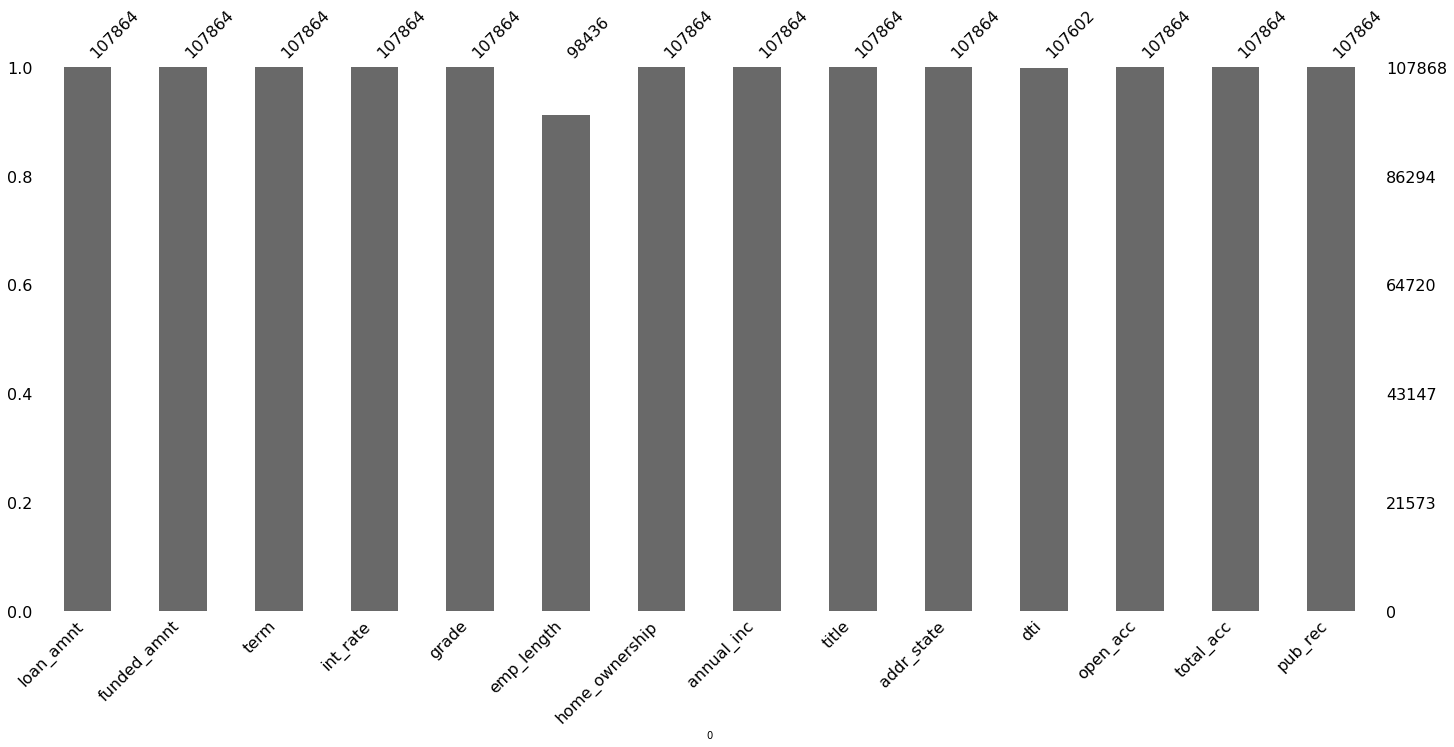

In [8]:
%matplotlib inline
msno.bar(new_df)

In [9]:
new_df = new_df.dropna()

A look at individual entries reveal that empty data is represented by an empty string object, a Nonetype object, or a string 'n/a'. By replacing those with NaN and running missingno, we see a large number of missing fields under 'emp_length'. 

Dropping the records with missing data yield 98,424 rows, not a large dilution of the initial number.

Based on the nature of the individual variables, they have to be converted to the following data types to be useful in any subsequent analysis:

Integer data type:
- loan_amnt
- funded_amnt
- term
- open_acc
- total_acc
- pub_rec

Float data type:
- int_rate
- dti

Ordered category data type:
- grade
- emp_length
- annual_inc

### Integer data types

For most of the integer type conversions, a simple conversion is possible with 'astype'. However, the 'term' variable is currently represented by '36 Months' and '60 Months'. Additional transformation will have to be applied on it.

In [10]:
new_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
new_df['term'] = new_df['term'].map({' 36 months':np.int(36),' 60 months':np.int(60)})

In [12]:
int_cols = ['loan_amnt','funded_amnt','open_acc','total_acc','pub_rec']
for col in int_cols:
    new_df[col] = new_df[col].astype(int)

### Float data types

The interest rate column has to be sanitized before conversion to float due to the spaces and percentage symbol.

In [13]:
new_df['int_rate'] = new_df['int_rate'].replace([' ','%'],'',regex = True)

In [14]:
float_cols = ['int_rate','dti']
for col in float_cols:
    new_df[col] = new_df[col].astype(float)

### Ordered categorical data types

Categorical data types are slightly trickier and we will go through them one by one.

For the 'grade' variable, the order matters and a grade of A conveys the highest loan quality. The categorical variable is thus ordered as such.

In [15]:
new_df['grade'].unique()

array(['B', 'E', 'A', 'C', 'D', 'G', 'F'], dtype=object)

In [16]:
ordered_grade = ['G','F','E','D','C','B','A']
new_df['grade'] = new_df['grade'].astype('category', ordered = True, categories=ordered_grade).cat.codes

By the same process, we can convert employment length to an ordinal variable as well since the entire '>1 year' and '10+ years' don't convey the necessary information.

In [17]:
new_df['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '6 years', '3 years', '2 years',
       '7 years', '4 years', '1 year', '9 years', '8 years'], dtype=object)

In [18]:
ordered_emp = ['< 1 year','1 year','2 years','3 years','4 years',
               '5 years', '6 years', '7 years','8 years','9 years',
                '10+ years']
new_df['emp_length'] = new_df['emp_length'].astype('category', ordered = True, categories=ordered_emp).cat.codes

In [19]:
new_df['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

In [20]:
new_df['annual_inc'] = new_df['annual_inc'].astype(float)
new_df['annual_inc'].describe()

count    9.842400e+04
mean     8.163789e+04
std      7.906254e+04
min      3.300000e+01
25%      4.800000e+04
50%      6.800000e+04
75%      9.800000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

In [21]:
new_df['annual_inc'].max()

8365188.0

As there are too many unique values in annual income, it is more useful to separate them into categories based on the value band that they fall in. I have used pd.qcut in this case to allocate a bin for each range of values.

'qcut' will divide the items such that there are an equal number of items in each bin. Note that there is another method called pd.cut. 'cut' allocates items to bins by the values, regardless of the number of items in each bin. 

While my initial inclination was to use cut to get a better perspective of the income ranges, it turns out that there were multiple outliers that skewed the data greatly. As seen from the number of items in each bin, using 'cut' provided a balanced view of the income data.

In [22]:
income_bins = [1,2,3,4,5]
print(pd.cut(new_df['annual_inc'],5).value_counts())

(-8332.155, 1673064.0]    98409
(1673064.0, 3346095.0]        9
(6692157.0, 8365188.0]        3
(3346095.0, 5019126.0]        2
(5019126.0, 6692157.0]        1
Name: annual_inc, dtype: int64


In [23]:
print(pd.qcut(new_df['annual_inc'],5).value_counts())

(44000.0, 60000.0]       22121
(32.999, 44000.0]        19739
(107000.0, 8365188.0]    19535
(78000.0, 107000.0]      19400
(60000.0, 78000.0]       17629
Name: annual_inc, dtype: int64


In [24]:
new_df['income_bins'] = pd.qcut(new_df['annual_inc'],5,income_bins).cat.codes
new_df['income_bins'].head()

1    1
2    4
3    1
4    4
5    1
Name: income_bins, dtype: int8

In [25]:
new_df['title'].unique()

array(['Debt consolidation', 'Credit card refinancing', 'Major purchase',
       'Home improvement', 'Home buying', 'Other', 'Car financing',
       'Business', 'Medical expenses', 'Moving and relocation', 'Vacation',
       'Green loan'], dtype=object)

In [26]:
new_df['addr_state'].unique()

array(['MO', 'NC', 'WI', 'NY', 'WV', 'LA', 'TX', 'NJ', 'FL', 'TN', 'GA',
       'WA', 'AR', 'IL', 'CA', 'WY', 'MN', 'CO', 'DC', 'PA', 'ME', 'IN',
       'MI', 'OR', 'OK', 'UT', 'AL', 'NV', 'AZ', 'CT', 'OH', 'VA', 'HI',
       'NM', 'MD', 'MA', 'KY', 'NH', 'ND', 'MS', 'DE', 'SC', 'KS', 'NE',
       'AK', 'RI', 'VT', 'MT', 'ID', 'SD'], dtype=object)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98424 entries, 1 to 107864
Data columns (total 15 columns):
loan_amnt         98424 non-null int64
funded_amnt       98424 non-null int64
term              98424 non-null int64
int_rate          98424 non-null float64
grade             98424 non-null int8
emp_length        98424 non-null int8
home_ownership    98424 non-null object
annual_inc        98424 non-null float64
title             98424 non-null object
addr_state        98424 non-null object
dti               98424 non-null float64
open_acc          98424 non-null int64
total_acc         98424 non-null int64
pub_rec           98424 non-null int64
income_bins       98424 non-null int8
dtypes: float64(3), int64(6), int8(3), object(3)
memory usage: 10.0+ MB


## Initial Analysis

What does this processed data tell us?

### Distributions

It seemed like the distributions of loan amounts, interest rates, debt-income-ratio would be interesting to plot. 

The skewedness and kurtosis for loan amounts and interest rates deviate from that of a normal distribution but are quite low. A low skewedness value indicates that there isn't a drastic difference between the weight of the two tails. The values do not lean towards a particular direction. A low kurtosis value indicates a low combined weight of both tails, indicating a weak presence of outliers.

Skewness: 0.711074
Kurtosis: -0.416018


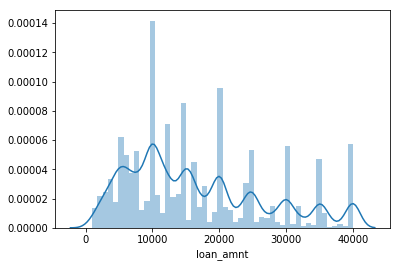

In [28]:
%matplotlib inline
sb.distplot(new_df['loan_amnt'])
print('Skewness: %f' % new_df['loan_amnt'].skew())
print('Kurtosis: %f'% new_df['loan_amnt'].kurt())

It is interesting to note the spikes for loan amounts happen in intervals of $5000. Could step-wise pricing strategies be possible given this preference for nice whole numbers?

Skewness: 0.865625
Kurtosis: 0.595596


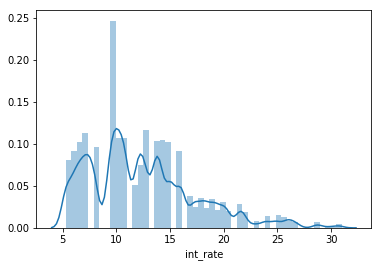

In [29]:
sb.distplot(new_df['int_rate'])
print('Skewness: %f' % new_df['int_rate'].skew())
print('Kurtosis: %f'% new_df['int_rate'].kurt())

There is a noticeable peak for interest rates right under a yield of 10%. This would seem to make sense given that high yielding corporate bonds hover around 7.5% and P2P loans have to justify their risk profile with higher rates.

Skewness: 26.326967
Kurtosis: 1247.763865


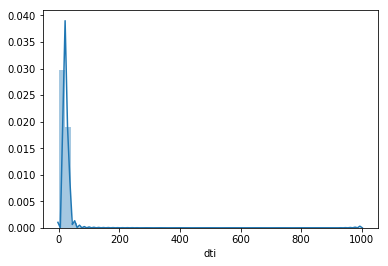

In [30]:
sb.distplot(new_df['dti'])
print('Skewness: %f' % new_df['dti'].skew())
print('Kurtosis: %f'% new_df['dti'].kurt())

In [31]:
new_df['dti'].describe()

count    98424.000000
mean        19.149704
std         18.011049
min          0.000000
25%         11.200000
50%         17.520000
75%         24.760000
max        999.000000
Name: dti, dtype: float64

The distribution for debt-to-income ratio is remarkably skewed, with very heavy tails. It would be interesting to examine individual outlier cases for how loans were granted to such risky individuals.

### Correlations

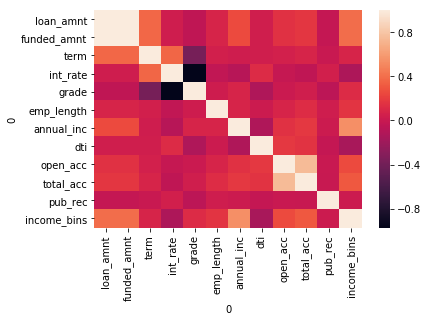

In [32]:
%matplotlib inline
sb.heatmap(new_df.corr())

Judging by the correlation matrix, it would seem that the ordered category types have been processed correctly. Most notably, there is a heavy negative correlation between the interest rate and grade of an individual loan. This would make sense as the lower the grade of the loan, the higher the interest rate necessary to justify the increased risk.

### Home Ownership and Home-Related Lending



In [33]:
new_df['title'].unique()

array(['Debt consolidation', 'Credit card refinancing', 'Major purchase',
       'Home improvement', 'Home buying', 'Other', 'Car financing',
       'Business', 'Medical expenses', 'Moving and relocation', 'Vacation',
       'Green loan'], dtype=object)

In [34]:
new_df['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

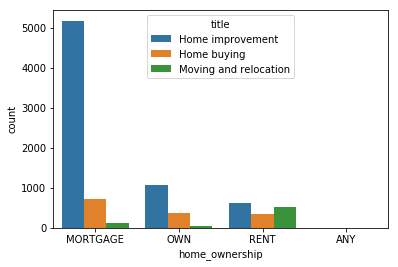

In [35]:
housing_titles = ['Home buying', 'Home improvement', 'Moving and relocation']
housing_df = new_df.loc[new_df['title'].isin(housing_titles)]
%matplotlib inline
sb.countplot(data=housing_df, x = 'home_ownership', hue = 'title')

Looking at the types of loans, there were specific home-related loan types that stood out. Given that there was information on the home ownership status of borrowers, I created a new dataframe with home specific loans to look for interesting trends.

At first glance, there is an overwhelming number of borrowers with mortgages that are taking out loans for home improvement, almost 5X that of home owners and renters. They are also the group with the most number of loans taken out for the purposes of buying a home.

Do home owners that take out mortgages just really like repainting houses and installing chandeliers? One explanation could be that these home improvements are not for themselves but for increasing property values before they flip it. These fix and flip operations are not new and there are in-depth reports of this phenomenon at Attom. It would make sense for such temporary home owners to frequent P2P lenders for home improvement loans. A public dataset for home flipping activity across states would have made for a more insightful look at the borrower composition of this P2P loan.

Another interesting observation was that of 'Moving and relocation' loans for renters. While the number of such loans are close to negligible for the other groups, home renters

### Loan Grades Across Different Loan Types

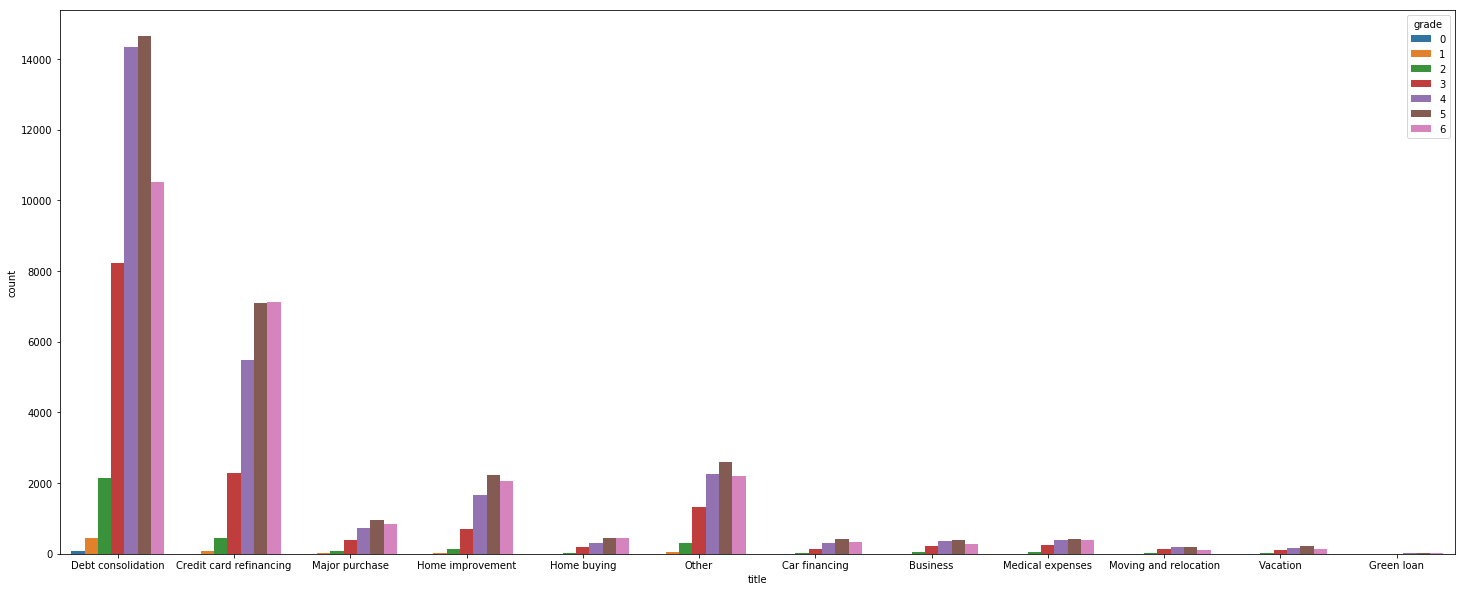

In [36]:
%matplotlib inline
plt.figure(figsize=(25,10))
sb.countplot(data=new_df, x='title', hue='grade')

### Number of Loans Across States

In [37]:
loans_no = new_df['addr_state'].value_counts()
print(loans_no.keys())
print(loans_no['CA'])

Index(['CA', 'TX', 'NY', 'FL', 'IL', 'NJ', 'GA', 'OH', 'PA', 'NC', 'VA', 'MI',
       'MD', 'CO', 'AZ', 'MA', 'WA', 'IN', 'MN', 'TN', 'CT', 'MO', 'NV', 'WI',
       'SC', 'OR', 'AL', 'LA', 'KY', 'OK', 'KS', 'AR', 'UT', 'MS', 'WV', 'NE',
       'NH', 'NM', 'RI', 'HI', 'ID', 'MT', 'ME', 'DE', 'AK', 'VT', 'WY', 'ND',
       'SD', 'DC'],
      dtype='object')
13470


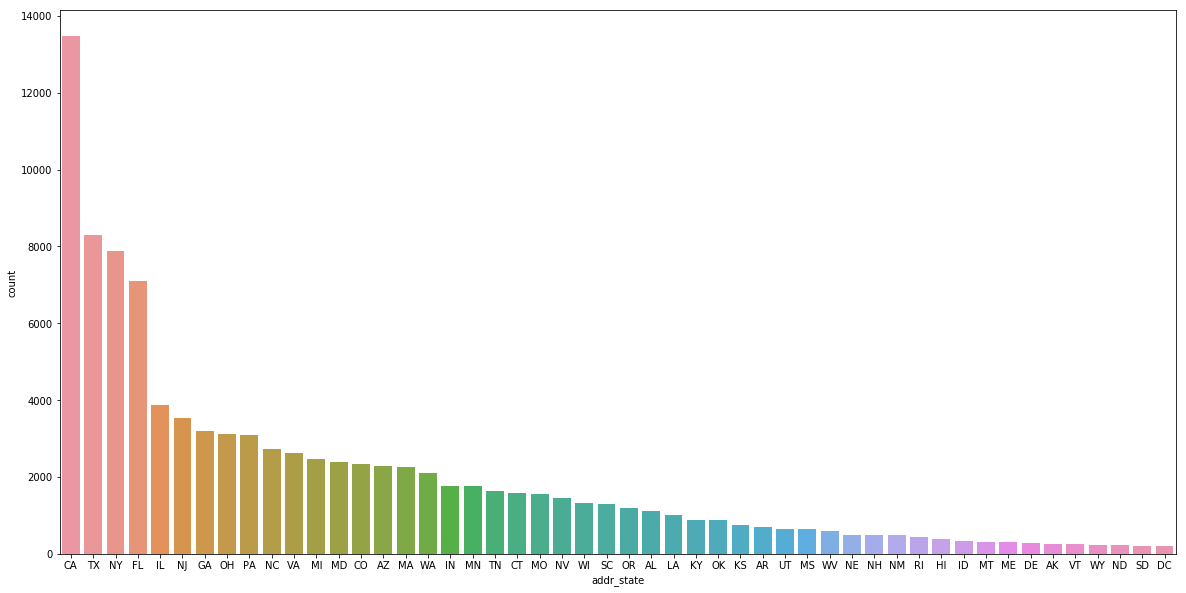

In [38]:
%matplotlib inline
plt.figure(figsize=(20,10))
sb.countplot(data=new_df, x='addr_state', order = new_df['addr_state'].value_counts().index)

In [71]:
import plotly.plotly as py

scl = [[0.0, 'FDF5EE'],[0.1, 'FBEBDE'],[0.2, 'FAE2CD'],[0.3, 'F8D8BD'],[0.4, 'F7CFAD'],[0.5, 'F5C59C'],[0.6, 'F4BC8C'],[0.7, 'F2B27C'],[0.8, 'F1A96B'],[0.9, 'EF9F5B'],[1.0, 'EE964B']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = loans_no.keys(),
        z = loans_no,
        locationmode = 'USA-states',
        text = loans_no.astype('str'),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No. of Loans")
        ) ]

layout = dict(
        title = '2018Q1 Total P2P Loans by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [40]:
home_buying = new_df[new_df['title'] == 'Home buying'].groupby('addr_state').count()['title']
home_improvement = new_df[new_df['title'] == 'Home improvement'].groupby('addr_state').count()['title']
moving = new_df[new_df['title'] == 'Moving and relocation'].groupby('addr_state').count()['title']
moving['AK'] = 0
moving['ME'] = 0
home_related_loans = home_buying + home_improvement + moving

In [41]:
home_df = pd.DataFrame({'home_buying': home_buying,'home_improvement': home_improvement, 'moving':moving, 'home_related_loans':home_related_loans})

In [42]:
home_df.head()

,home_buying,home_improvement,home_related_loans,moving
AK,4,13,17,0
AL,19,92,116,5
AR,10,48,61,3
AZ,33,185,239,21
CA,146,774,1014,94


In [43]:
home_df

,home_buying,home_improvement,home_related_loans,moving
AK,4,13,17,0
AL,19,92,116,5
AR,10,48,61,3
AZ,33,185,239,21
CA,146,774,1014,94
CO,21,178,214,15
CT,22,118,145,5
DC,2,14,19,3
DE,2,17,20,1
FL,143,625,833,65


### External data

Given the above state level grouping, why not go one step further in analyzing some state level data?

I went to www.census.gov and scraped state level data that ranged from demographic to economic figures.

In [44]:
state_codes = new_df['addr_state'].unique()

In [45]:
state_codes

array(['MO', 'NC', 'WI', 'NY', 'WV', 'LA', 'TX', 'NJ', 'FL', 'TN', 'GA',
       'WA', 'AR', 'IL', 'CA', 'WY', 'MN', 'CO', 'DC', 'PA', 'ME', 'IN',
       'MI', 'OR', 'OK', 'UT', 'AL', 'NV', 'AZ', 'CT', 'OH', 'VA', 'HI',
       'NM', 'MD', 'MA', 'KY', 'NH', 'ND', 'MS', 'DE', 'SC', 'KS', 'NE',
       'AK', 'RI', 'VT', 'MT', 'ID', 'SD'], dtype=object)

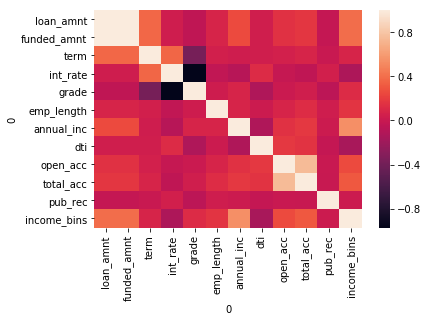

In [46]:
sb.heatmap(new_df.corr())

In [47]:
%store -r states_data

In [48]:
states_data.head()

Fact,"Population estimates, July 1, 2017, (V2017)","Population estimates base, April 1, 2010, (V2017)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",state_name,addr_state
Missouri,"6,113,532","5,988,925",2.1%,"5,988,927",6.1%,22.6%,16.5%,50.9%,83.1%,11.8%,...,"257,948","162,616","61,035","415,972","49,217","415,542",87.1,"68,741.52",Missouri,MO
North Carolina,"10,273,419","9,535,721",7.7%,"9,535,483",5.9%,22.4%,15.9%,51.3%,70.8%,22.2%,...,"435,677","287,058","183,380","603,182","86,571","684,743",196.1,"48,617.91",North Carolina,NC
Wisconsin,"5,795,483","5,687,288",1.9%,"5,686,986",5.8%,22.1%,16.5%,50.3%,87.3%,6.7%,...,"236,252","133,859","40,507","379,934","39,830","370,755",105.0,"54,157.80",Wisconsin,WI
New York,"19,849,399","19,378,110",2.4%,"19,378,102",5.9%,20.9%,15.9%,51.4%,69.6%,17.7%,...,"1,139,910","725,709","709,021","1,248,304","137,532","1,811,544",411.2,"47,126.40",New York,NY
West Virginia,"1,815,857","1,853,006",-2.0%,"1,852,994",5.4%,20.4%,19.4%,50.5%,93.6%,3.6%,...,"63,112","39,065","5,777","104,785","12,912","94,960",77.1,"24,038.21",West Virginia,WV


In [49]:
house_df = pd.read_excel('house_price.xls')
house_df.columns = house_df.iloc[0]
house_df = house_df.drop([0])
house_df.head()

,Series ID,Region Name,Region Code,2016 Q1,2016 Q2,2016 Q3,2016 Q4,2017 Q1,2017 Q2,2017 Q3,2017 Q4,2018 Q1
1,ALSTHPI,Alabama,01,292.16,295.87,301.13,300.46,301.85,306.78,310.11,312.49,313.29
2,AKSTHPI,Alaska,02,311.61,315.18,315.29,313.66,315.67,317.61,322.27,324.48,321.37
3,AZSTHPI,Arizona,04,334.77,342.43,347.88,354.04,361.23,372.35,381.15,385.16,393.77
4,ARSTHPI,Arkansas,05,259.32,262.81,266.81,269.01,271.11,273.96,276.88,280.14,279.76
5,CASTHPI,California,06,549.18,558.87,570.17,578.89,590.62,604.36,616.05,627.1,638.37


In [50]:
house_df['house_price_change'] = (house_df['2018 Q1'] - house_df['2016 Q1'])/house_df['2016 Q1']*100
house_df = house_df[['Region Name','house_price_change']]
house_df.columns = ['state_name','house_price_change']
house_df.head()

,state_name,house_price_change
1,Alabama,7.23234
2,Alaska,3.13212
3,Arizona,17.624
4,Arkansas,7.88215
5,California,16.2406


In [51]:
states_data = pd.merge(states_data, house_df, on='state_name', how='left')
states_data.head()

,"Population estimates, July 1, 2017, (V2017)","Population estimates base, April 1, 2010, (V2017)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2017, (V2017)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",state_name,addr_state,house_price_change
0,"6,113,532","5,988,925",2.1%,"5,988,927",6.1%,22.6%,16.5%,50.9%,83.1%,11.8%,...,"162,616","61,035","415,972","49,217","415,542",87.1,"68,741.52",Missouri,MO,10.5202
1,"10,273,419","9,535,721",7.7%,"9,535,483",5.9%,22.4%,15.9%,51.3%,70.8%,22.2%,...,"287,058","183,380","603,182","86,571","684,743",196.1,"48,617.91",North Carolina,NC,12.4686
2,"5,795,483","5,687,288",1.9%,"5,686,986",5.8%,22.1%,16.5%,50.3%,87.3%,6.7%,...,"133,859","40,507","379,934","39,830","370,755",105.0,"54,157.80",Wisconsin,WI,10.3939
3,"19,849,399","19,378,110",2.4%,"19,378,102",5.9%,20.9%,15.9%,51.4%,69.6%,17.7%,...,"725,709","709,021","1,248,304","137,532","1,811,544",411.2,"47,126.40",New York,NY,11.1661
4,"1,815,857","1,853,006",-2.0%,"1,852,994",5.4%,20.4%,19.4%,50.5%,93.6%,3.6%,...,"39,065","5,777","104,785","12,912","94,960",77.1,"24,038.21",West Virginia,WV,5.11479


In [52]:
states_data.columns

Index(['Population estimates, July 1, 2017,  (V2017)',
       'Population estimates base, April 1, 2010,  (V2017)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2017,  (V2017)',
       'Population, Census, April 1, 2010', 'Persons under 5 years, percent',
       'Persons under 18 years, percent', 'Persons 65 years and over, percent',
       'Female persons, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2012-2016',
       'Foreign born persons, percent, 2012-2016',
       'Housing units,  July 1, 2017,  (V2017)',
       'Owner-occupied housing unit rate, 2012-2016',
       'Median value of owner-occupied housing units, 2012-2016

In [53]:
states_data = states_data[['Black or African American alone, percent','Housing units,  July 1, 2017,  (V2017)',
       'Owner-occupied housing unit rate, 2012-2016',
       'Median value of owner-occupied housing units, 2012-2016',
       'Median selected monthly owner costs -with a mortgage, 2012-2016',
       'Median selected monthly owner costs -without a mortgage, 2012-2016',
       'Median gross rent, 2012-2016', 'Building permits, 2017','Median household income (in 2016 dollars), 2012-2016',
       'Per capita income in past 12 months (in 2016 dollars), 2012-2016',
       'Persons in poverty, percent', 'state_name','addr_state','house_price_change']]

In [54]:
states_data.columns = ['africa_american','housing_units','median_owner_occupied_rate','median_owner_occupied_value',
                      'median_owner_occupied_monthly_mortgage','median_owner_occupied_monthly_no_mortgage','median_rent',
                      'building_permits','median_household_income','percapita_income','poverty_rate','state_name','addr_state','house_price_change']

In [55]:
states_data.head()

,africa_american,housing_units,median_owner_occupied_rate,median_owner_occupied_value,median_owner_occupied_monthly_mortgage,median_owner_occupied_monthly_no_mortgage,median_rent,building_permits,median_household_income,percapita_income,poverty_rate,state_name,addr_state,house_price_change
0,11.8%,"2,792,506",66.8%,"$141,200","$1,210",$407,$759,"18,811","$49,593","$27,044",14.0%,Missouri,MO,10.5202
1,22.2%,"4,622,575",64.8%,"$157,100","$1,243",$376,$816,"67,047","$48,256","$26,779",15.4%,North Carolina,NC,12.4686
2,6.7%,"2,695,462",67.0%,"$167,000","$1,391",$532,$789,"19,545","$54,610","$29,253",11.8%,Wisconsin,WI,10.3939
3,17.7%,"8,327,388",53.6%,"$286,300","$2,030",$712,"$1,159","39,350","$60,741","$34,212",14.7%,New York,NY,11.1661
4,3.6%,"892,226",72.5%,"$107,400",$977,$298,$658,"2,719","$42,644","$24,002",17.9%,West Virginia,WV,5.11479


In [56]:
states_data[['africa_american','housing_units','median_owner_occupied_rate','median_owner_occupied_value',
                      'median_owner_occupied_monthly_mortgage','median_owner_occupied_monthly_no_mortgage','median_rent',
                      'building_permits','median_household_income','percapita_income','poverty_rate']] = states_data[['africa_american','housing_units','median_owner_occupied_rate','median_owner_occupied_value',
                      'median_owner_occupied_monthly_mortgage','median_owner_occupied_monthly_no_mortgage','median_rent',
                      'building_permits','median_household_income','percapita_income','poverty_rate']].replace([' ','%','\$',','],'',regex = True)

states_data.head()

,africa_american,housing_units,median_owner_occupied_rate,median_owner_occupied_value,median_owner_occupied_monthly_mortgage,median_owner_occupied_monthly_no_mortgage,median_rent,building_permits,median_household_income,percapita_income,poverty_rate,state_name,addr_state,house_price_change
0,11.8,2792506,66.8,141200,1210,407,759,18811,49593,27044,14.0,Missouri,MO,10.5202
1,22.2,4622575,64.8,157100,1243,376,816,67047,48256,26779,15.4,North Carolina,NC,12.4686
2,6.7,2695462,67.0,167000,1391,532,789,19545,54610,29253,11.8,Wisconsin,WI,10.3939
3,17.7,8327388,53.6,286300,2030,712,1159,39350,60741,34212,14.7,New York,NY,11.1661
4,3.6,892226,72.5,107400,977,298,658,2719,42644,24002,17.9,West Virginia,WV,5.11479


In [57]:
states_data[['africa_american','median_owner_occupied_rate','poverty_rate','house_price_change']] = states_data[['africa_american','median_owner_occupied_rate','poverty_rate','house_price_change']].astype('float')

In [58]:
states_data[['housing_units','median_owner_occupied_value',
            'median_owner_occupied_monthly_mortgage','median_owner_occupied_monthly_no_mortgage','median_rent',
            'building_permits','median_household_income','percapita_income']] = states_data[['housing_units','median_owner_occupied_value',
            'median_owner_occupied_monthly_mortgage','median_owner_occupied_monthly_no_mortgage','median_rent',
            'building_permits','median_household_income','percapita_income']].astype('int')

In [59]:
states_data.dtypes

africa_american                              float64
housing_units                                  int64
median_owner_occupied_rate                   float64
median_owner_occupied_value                    int64
median_owner_occupied_monthly_mortgage         int64
median_owner_occupied_monthly_no_mortgage      int64
median_rent                                    int64
building_permits                               int64
median_household_income                        int64
percapita_income                               int64
poverty_rate                                 float64
state_name                                    object
addr_state                                    object
house_price_change                           float64
dtype: object

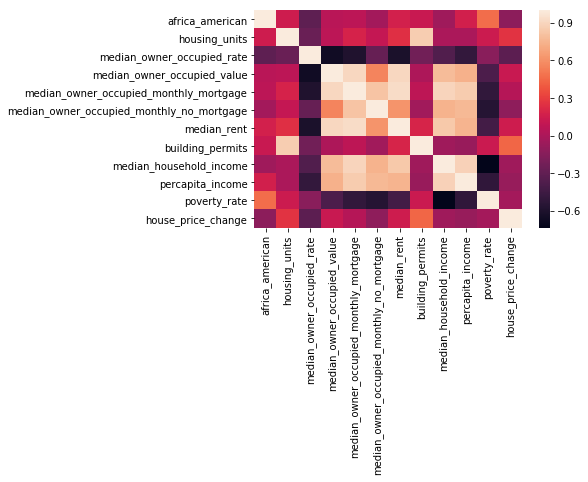

In [60]:
%matplotlib inline
sb.heatmap(states_data.corr())

In [61]:
states_data.corr()

,africa_american,housing_units,median_owner_occupied_rate,median_owner_occupied_value,median_owner_occupied_monthly_mortgage,median_owner_occupied_monthly_no_mortgage,median_rent,building_permits,median_household_income,percapita_income,poverty_rate,house_price_change
africa_american,1.000000,0.146775,-0.309935,0.057373,0.072242,-0.034425,0.169138,0.123618,-0.042883,0.164306,0.468441,-0.119126
housing_units,0.146775,1.000000,-0.263582,0.066456,0.186079,0.100722,0.242221,0.863506,0.001855,-0.000382,0.134411,0.259011
median_owner_occupied_rate,-0.309935,-0.263582,1.000000,-0.658191,-0.584627,-0.275553,-0.610515,-0.231540,-0.361854,-0.502096,-0.133278,-0.315581
median_owner_occupied_value,0.057373,0.066456,-0.658191,1.000000,0.905923,0.554739,0.910332,0.006422,0.790058,0.742262,-0.385703,0.124304
median_owner_occupied_monthly_mortgage,0.072242,0.186079,-0.584627,0.905923,1.000000,0.820918,0.931121,0.077823,0.895060,0.851936,-0.505209,0.039955
median_owner_occupied_monthly_no_mortgage,-0.034425,0.100722,-0.275553,0.554739,0.820918,1.000000,0.615117,-0.040165,0.747950,0.770410,-0.560127,-0.116285
median_rent,0.169138,0.242221,-0.610515,0.910332,0.931121,0.615117,1.000000,0.190732,0.842343,0.751198,-0.422066,0.145418
building_permits,0.123618,0.863506,-0.231540,0.006422,0.077823,-0.040165,0.190732,1.000000,-0.047097,-0.076033,0.131652,0.439077
median_household_income,-0.042883,0.001855,-0.361854,0.790058,0.895060,0.747950,0.842343,-0.047097,1.000000,0.879760,-0.733362,-0.043972
percapita_income,0.164306,-0.000382,-0.502096,0.742262,0.851936,0.770410,0.751198,-0.076033,0.879760,1.000000,-0.512298,-0.081842


In [62]:
states_data.index = states_data['addr_state']
states_data.head()
home_df = home_df.join(states_data)
home_df.head()

,home_buying,home_improvement,home_related_loans,moving,africa_american,housing_units,median_owner_occupied_rate,median_owner_occupied_value,median_owner_occupied_monthly_mortgage,median_owner_occupied_monthly_no_mortgage,median_rent,building_permits,median_household_income,percapita_income,poverty_rate,state_name,addr_state,house_price_change
AK,4,13,17,0,3.7,316952,63.7,257100,1846,558,1173,1539,74444,34191,9.9,Alaska,AK,3.132120
AL,19,92,116,5,26.8,2258596,68.5,128500,1137,343,728,14799,44758,24736,17.1,Alabama,AL,7.232338
AR,10,48,61,3,15.7,1370111,65.7,114700,1021,329,689,10795,42336,23401,17.2,Arkansas,AR,7.882153
AZ,33,185,239,21,5.0,2999157,62.6,176900,1332,385,937,39472,51340,26686,16.4,Arizona,AZ,17.624040
CA,146,774,1014,94,6.5,14176670,54.1,409300,2157,517,1297,114780,63783,31458,14.3,California,CA,16.240577


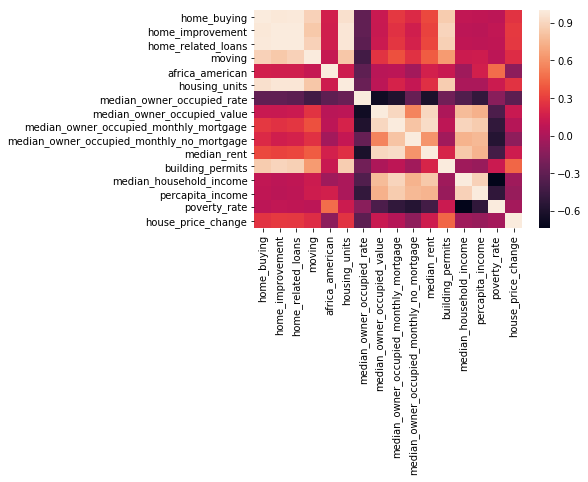

In [63]:
sb.heatmap(home_df.corr())

In [64]:
import statsmodels.api as sm

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [65]:
X = home_df[['africa_american', 'housing_units', 'median_owner_occupied_rate',
       'median_owner_occupied_value', 'median_owner_occupied_monthly_mortgage',
       'median_owner_occupied_monthly_no_mortgage', 'median_rent',
       'building_permits', 'median_household_income', 'percapita_income',
       'poverty_rate', 'house_price_change']]
y = home_df['home_related_loans']
model = sm.OLS(y, X.astype(float)).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     home_related_loans   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           9.54e-31
Time:                        13:19:54   Log-Likelihood:                -248.35
No. Observations:                  50   AIC:                             520.7
Df Residuals:                      38   BIC:                             543.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
africa_american                              -0.8223      0.780     -1.055      0.298      -2.401       0.756
housing_units                                5.8e-05   4.79e-06     12.103      0.000    4.83e-05    6.77e-05
median_owner_occupied_rate                   -1.6725      1.176     -1.422      0.163      -4.054       0.709
median_owner_occupied_value                  -0.0006      0.000     -1.882      0.067      -0.001     4.7e-05
median_owner_occupied_monthly_mortgage        0.0855      0.188      0.455      0.652      -0.295       0.466
median_owner_occupied_monthly_no_mortgage     0.0350      0.194      0.181      0.858      -0.357       0.427
median_rent                                   0.3660      0.138      2.653      0.012       0.087       0.645
building_permits                              0.0011      0.000      2.721      0.010       0.000       0.002
median_household_income                      -0.0045      0.003     -1.375      0.177      -0.011       0.002
percapita_income                              0.0017      0.003      0.503      0.618      -0.005       0.009
poverty_rate                                 -1.8725      3.321     -0.564      0.576      -8.595       4.850
house_price_change                           -1.2349      1.337     -0.924      0.362      -3.942       1.472
==============================================================================
Omnibus:                        1.778   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.597
Skew:                           0.314   Prob(JB):                        0.450
Kurtosis:                       2.390   Cond. No.                     2.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
home_df.columns

Index(['home_buying', 'home_improvement', 'home_related_loans', 'moving',
       'africa_american', 'housing_units', 'median_owner_occupied_rate',
       'median_owner_occupied_value', 'median_owner_occupied_monthly_mortgage',
       'median_owner_occupied_monthly_no_mortgage', 'median_rent',
       'building_permits', 'median_household_income', 'percapita_income',
       'poverty_rate', 'state_name', 'addr_state', 'house_price_change'],
      dtype='object')

In [67]:
full_df = pd.merge(new_df, states_data, on='addr_state', how='left')

In [68]:
full_df

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,title,addr_state,...,median_owner_occupied_value,median_owner_occupied_monthly_mortgage,median_owner_occupied_monthly_no_mortgage,median_rent,building_permits,median_household_income,percapita_income,poverty_rate,state_name,house_price_change
0,3000,3000,36,10.41,5,10,MORTGAGE,60000.0,Debt consolidation,MO,...,141200,1210,407,759,18811,49593,27044,14.0,Missouri,10.520204
1,14100,14100,36,23.87,2,0,OWN,128000.0,Debt consolidation,NC,...,157100,1243,376,816,67047,48256,26779,15.4,North Carolina,12.468647
2,10000,10000,36,6.07,6,5,OWN,50000.0,Credit card refinancing,WI,...,167000,1391,532,789,19545,54610,29253,11.8,Wisconsin,10.393898
3,40000,40000,60,9.43,5,10,MORTGAGE,150000.0,Debt consolidation,NY,...,286300,2030,712,1159,39350,60741,34212,14.7,New York,11.166118
4,6300,6300,36,9.43,5,6,RENT,60000.0,Credit card refinancing,WV,...,107400,977,298,658,2719,42644,24002,17.9,West Virginia,5.114795
5,5000,5000,36,15.04,4,3,OWN,72000.0,Major purchase,LA,...,148300,1206,318,800,15224,45652,25515,20.2,Louisiana,6.803257
6,7000,7000,36,11.98,5,0,MORTGAGE,40000.0,Home improvement,TX,...,142700,1444,467,911,175112,54727,27828,15.6,Texas,16.111846
7,5000,5000,36,5.31,6,2,RENT,36610.0,Credit card refinancing,NJ,...,316400,2374,981,1213,28501,73702,37538,10.4,New Jersey,7.059987
8,21000,21000,60,20.39,3,10,OWN,85000.0,Home buying,NY,...,286300,2030,712,1159,39350,60741,34212,14.7,New York,11.166118
9,15000,15000,60,14.07,4,3,OWN,195000.0,Other,FL,...,166800,1422,466,1032,122719,48900,27598,14.7,Florida,19.541597


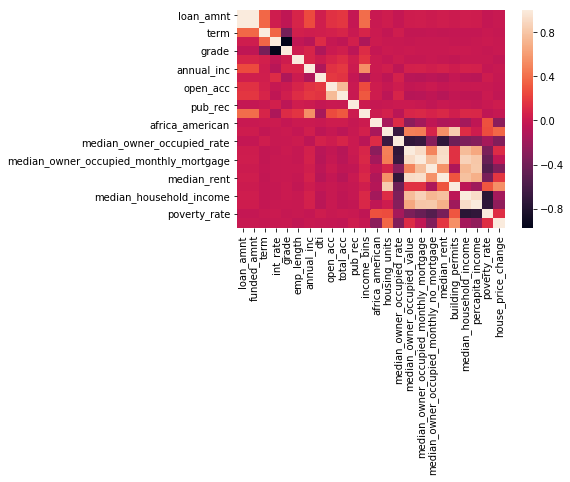

In [69]:
sb.heatmap(full_df.corr())

In [70]:
for x in full_df.columns:
    print (x)

loan_amnt
funded_amnt
term
int_rate
grade
emp_length
home_ownership
annual_inc
title
addr_state
dti
open_acc
total_acc
pub_rec
income_bins
africa_american
housing_units
median_owner_occupied_rate
median_owner_occupied_value
median_owner_occupied_monthly_mortgage
median_owner_occupied_monthly_no_mortgage
median_rent
building_permits
median_household_income
percapita_income
poverty_rate
state_name
house_price_change
